In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.utils import resample
import statistics

In [3]:
def variance(a) :
    m = sum(a) / len(a)
    var = sum((xi - m) ** 2 for xi in a) / len(a)
    return var

In [4]:
def std_dev(a):
    return np.sqrt(variance(a))

In [5]:
df = pd.read_csv("clean_kaggle_data.csv")

C:\Users\syy19\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#data preprocessing

In [7]:
col = ['Q1','Q2','Q3','Q4','Q5','Q6','Q24']# reconstruct dataframe using the columns that we want to study
df = df.loc[:,col]
df.columns = ['age','gender','country','degree','occupation','experience','salary']

In [8]:
df#.head()

,age,gender,country,degree,occupation,experience,salary
0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,125000
1,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,20000
2,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,150000
3,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,80000
4,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,40000
...,...,...,...,...,...,...,...
10724,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,3000
10725,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,20000
10726,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1000
10727,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1000


In [9]:
len(df['occupation'].unique())

11

In [10]:
#df.info()

In [11]:
#df.describe()

In [12]:
df.isnull().values.any()# no null data after preprocessing, so we do not need to clean data later

False

In [13]:
df.isnull().sum()#no null data after preprocessing

age           0
gender        0
country       0
degree        0
occupation    0
experience    0
salary        0
dtype: int64

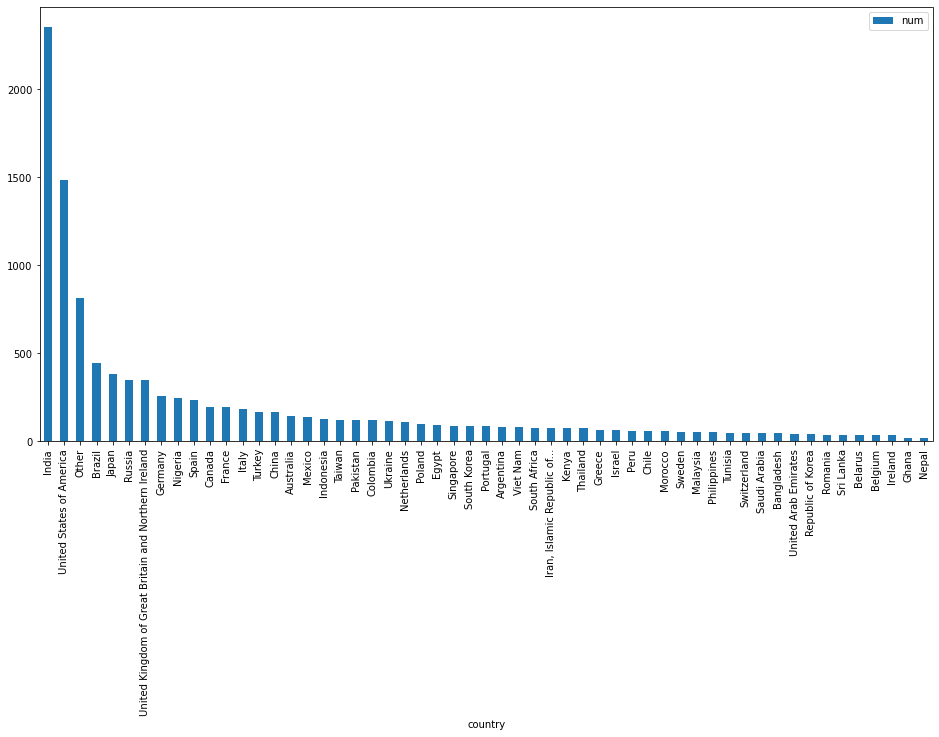

In [14]:
#PART 1
#1 the number of people taking the survey grouped by country(descending)
dfc = df.groupby('country').size().reset_index()#reverse groupby object to dataframe
dfc = dfc.rename({0: 'num'}, axis=1)
dfc.sort_values(by=['num'], inplace=True, ascending=False)#sort values
dfc.plot(kind = "bar",x='country',y='num',figsize=(16,8))
#plt.savefig('Q1.1.png',dpi=500)

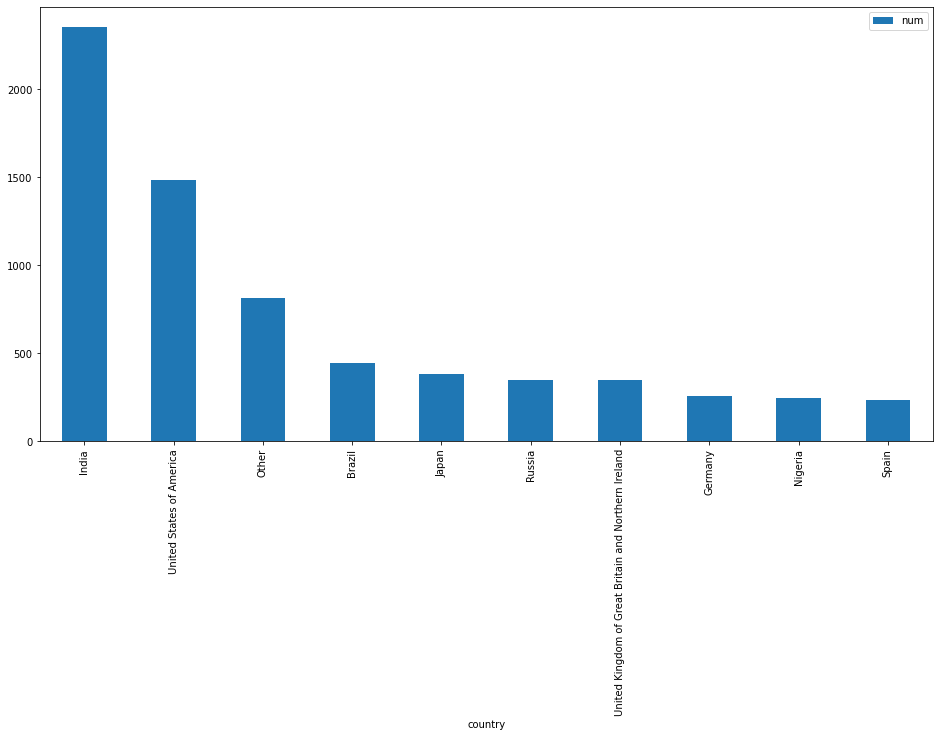

In [15]:
#take the top 10 countries from the previous result
dfc.sort_values(by=['num'], inplace=True, ascending=False)
dfc = dfc.iloc[0:10,:]
dfc.plot(kind = "bar",x='country',y='num',figsize=(16,8))
#plt.savefig('Q1.1.png',dpi=500)

In [16]:
#sum(df.country==('United States of America'))
#len(df.country.unique())

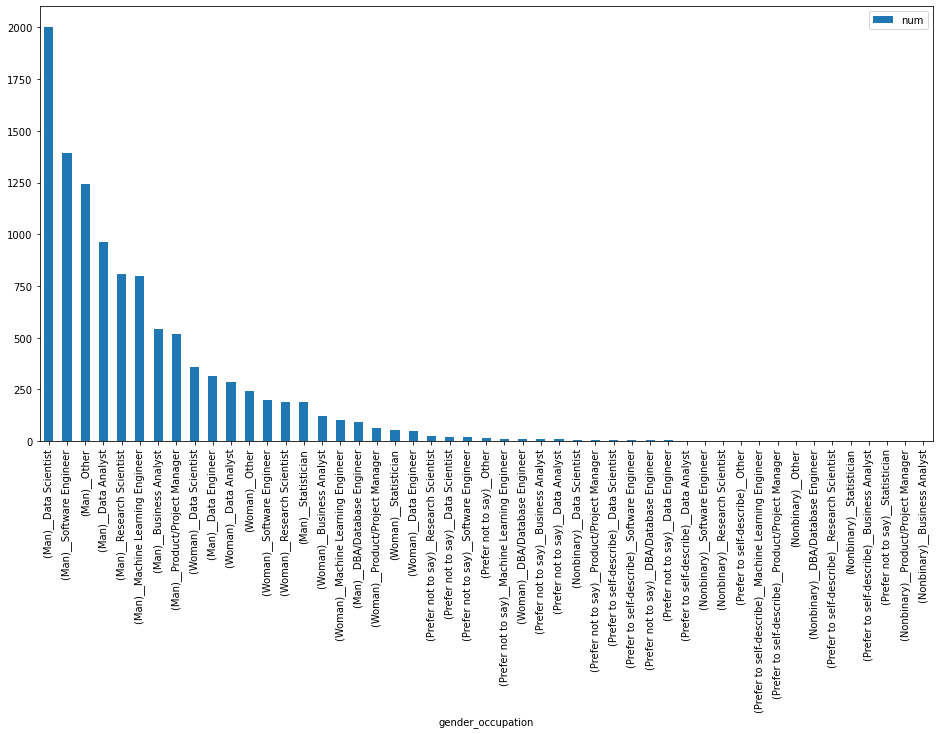

In [17]:
#2 number of people taking the survey according to gender and occupation(descending)
dfg = df.groupby(['gender','occupation']).size().reset_index().rename({0: 'num'}, axis=1)
dfg['gender_occupation'] = "("+dfg.gender+")" + "__"+dfg.occupation
dfg.sort_values(by=['num'], inplace=True, ascending=False)
dfg.gender_occupation.astype('str')
dfg.plot(kind = "bar",x='gender_occupation',y='num',figsize=(16,8))
#plt.savefig('Q1.2.png')


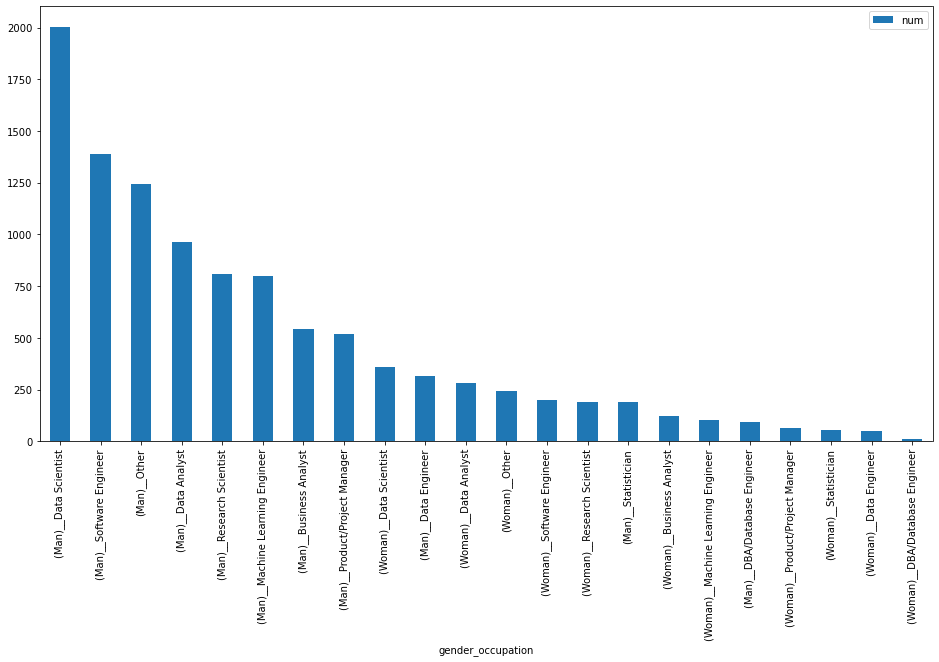

In [18]:
#since we are only interested in data about men and women for this assignment,I provided here an alternative plot of only men and women
dfg = df.groupby(['gender','occupation']).size().reset_index().rename({0: 'num'}, axis=1)
dfg = dfg[(dfg['gender']== 'Man') | (dfg['gender']=='Woman' )]
dfg['gender_occupation'] = "("+dfg.gender+")" + "__"+dfg.occupation
dfg.sort_values(by=['num'], inplace=True, ascending=False)
dfg.plot(kind = "bar",x='gender_occupation',y='num',figsize=(16,8))
#plt.savefig('Q1.3.png')

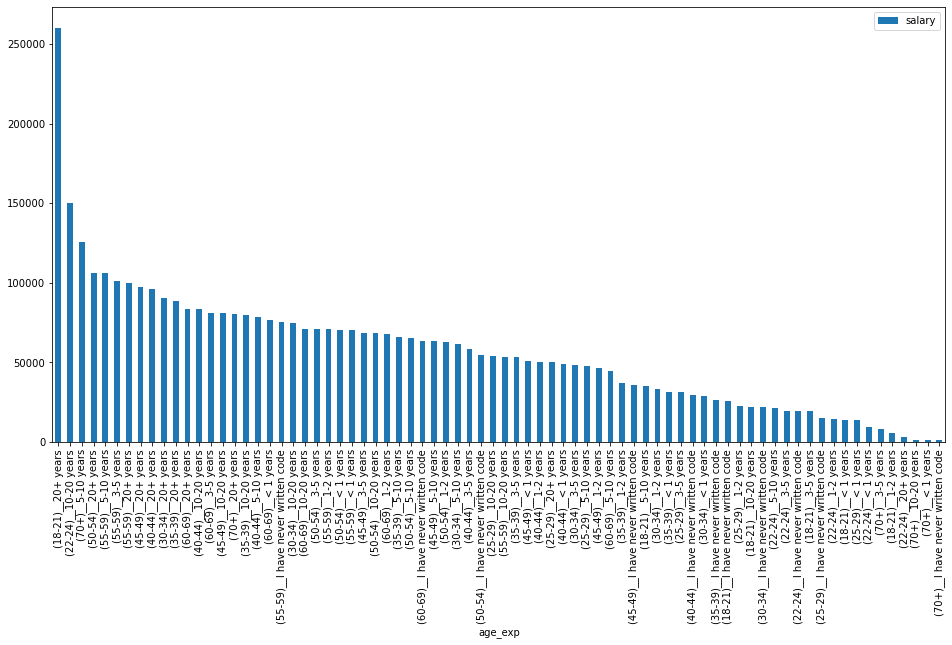

In [19]:
#3 the relationship between [age,professional experience] and mean salary
dfa = df.groupby(['age','experience'])['salary'].mean().reset_index()
dfa['age_exp'] = "("+dfa.age+")" + "__"+dfa.experience
dfa.sort_values(by=['salary'], inplace=True, ascending=False)
dfa.plot(kind = "bar",x='age_exp',y='salary',figsize=(16,8))
plt.savefig('Q1.4.png')

In [20]:
#dfa

In [21]:
#######################################################################################################################

In [22]:
#PART2 a
#df2 = df.groupby(['gender'])['salary'].mean().reset_index()
#df_gender = df2[(df2['gender']== 'Man') | (df2['gender']=='Woman' )]

In [23]:
female_salary = df[df['gender'] == 'Woman']['salary']
male_salary   = df[df['gender'] == 'Man']['salary']

In [24]:
female_salary.describe()#descriptive statistics for women

count      1683.000000
mean      36417.112299
std       59442.716093
min        1000.000000
25%        1000.000000
50%        7500.000000
75%       50000.000000
max      500000.000000
Name: salary, dtype: float64

In [25]:
male_salary.describe()#descriptive statistics for men

count      8872.000000
mean      50750.619928
std       70347.974812
min        1000.000000
25%        3000.000000
50%       25000.000000
75%       70000.000000
max      500000.000000
Name: salary, dtype: float64

In [26]:
#df[df['gender']== 'Man'].salary.mean()

In [27]:
#PART2 b#######################################################################################################################
#female_salary = df[df['gender'] == 'Woman']['salary']
#male_salary   = df[df['gender'] == 'Man']['salary']
td, pd = stats.ttest_ind(male_salary,female_salary)
print ("t-test: t = %g  p = %g" % (td, pd))

t-test: t = 7.84433  p = 4.77315e-15


In [28]:
pd > 0.05

False

In [29]:
#In the case of gender impact on salary, we conclude that men tend to have higher salary than women
#(p-value = 4.77315e-15 < 0.05, statistically significant).


In [30]:
#PART2 c bootstrap data comparision########################################################################################################

In [31]:
df[df['gender']== 'Man'].salary.count()#number of samples for men

8872

In [32]:
df[df['gender']== 'Woman'].salary.count()#number of samples for women

1683

In [33]:
dfm = df[df['gender']== 'Man']
dff = df[df['gender']== 'Woman']

In [34]:
#dff

In [35]:
#there are 8872 data for male and 1683 data for female in the original sample,
#the appropriate sample size for male and female should equal to the original sample size
sample_mean_man = []
for i in range(0,1000):#the repetition is 1000
    sample_mean_man.append(resample(dfm.salary, replace=True, n_samples=8872, random_state=i).mean())# bootstrapping using resample



In [36]:
len(sample_mean_man)

1000

In [37]:
sample_mean_woman = []
for i in range(0,1000):
    sample_mean_woman.append(resample(dff.salary, replace=True, n_samples=1683, random_state=i).mean())# bootstrapping using resample


In [38]:
len(sample_mean_woman)

1000

In [39]:
#difference in means for the 2 groups
sample_difference = [i - j for i,j in zip(sample_mean_man,sample_mean_woman)]

In [40]:
len(sample_difference)

1000

variance : 575888.9601992944
standard deviation : 758.8734810225578
mean : 50736.20976104599


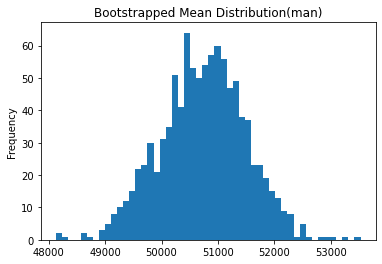

In [41]:
plt.hist(sample_mean_man, bins=50)# distribution for bootstrapped data
plt.gca().set(title='Bootstrapped Mean Distribution(man)', ylabel='Frequency')
print("variance :",statistics.variance(sample_mean_man))
print("standard deviation :",statistics.stdev(sample_mean_man))
print("mean :",statistics.mean(sample_mean_man))
#plt.savefig('Q2c.1.png')

variance : 2280923.5988003635
standard deviation : 1510.272690212057
mean : 36472.27035056447


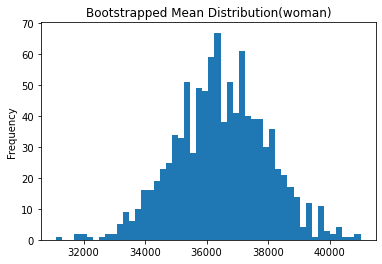

In [42]:
plt.hist(sample_mean_woman, bins=50)
plt.gca().set(title='Bootstrapped Mean Distribution(woman)', ylabel='Frequency')
print("variance :",statistics.variance(sample_mean_woman))
print("standard deviation :",statistics.stdev(sample_mean_woman))
print("mean :",statistics.mean(sample_mean_woman))
#plt.savefig('Q2c.2.png')

variance : 2857231.0908161
standard deviation : 1690.3346091280566
mean : 14263.939410481518


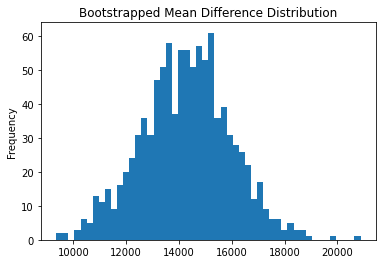

In [43]:
plt.hist(sample_difference, bins=50)# distribution of the difference
plt.gca().set(title='Bootstrapped Mean Difference Distribution', ylabel='Frequency')
print("variance :",statistics.variance(sample_difference))
print("standard deviation :",statistics.stdev(sample_difference))
print("mean :",statistics.mean(sample_difference))
#plt.savefig('Q2c.3.png')

In [44]:
#PART2 d t test on 2 groups########################################################################################################
td, pd  = stats.ttest_ind(sample_mean_woman,sample_mean_man)
print ("t-test: t = %g  p = %g" % (td, pd))

t-test: t = -266.869  p = 0


In [45]:
#In the case of gender impact on salary, we conclude that men tend to have higher average salary than women
#(p-value = 0 < 0.05, statistically significant).

In [46]:
#PART2 e # detailed analysis in report
print('Looking at the results from the 2 two-sample t-test, which both have a p-value < 0.05. This means we reject the null \n\
hypothesis and conclude that there is significant difference between men\'s salary and women\'s salary.\n \
Specifically, man tends to have higher salary than woman. ')

Looking at the results from the 2 two-sample t-test, which both have a p-value < 0.05. This means we reject the null 
hypothesis and conclude that there is significant difference between men's salary and women's salary.
 Specifically, man tends to have higher salary than woman. 


In [47]:

#The central limit theorem states that if you have a population with mean μ and standard deviation σ and 
#take sufficiently large random samples from the population with replacement , 
#then the distribution of the sample means will be approximately normally distributed.


In [48]:
#######################################################################################################################

In [49]:
#PART3 a descriptive statistics

In [50]:
#df3 = df.groupby(['degree'])['salary'].mean().reset_index()
#df3[(df3['degree'] == 'Bachelor’s degree')| (df3['degree'] == 'Master’s degree')|(df3['degree'] == 'Doctoral degree')]

In [51]:
bachelor = df[df['degree'] == 'Bachelor’s degree']
master = df[df['degree'] == 'Master’s degree']
doctor = df[df['degree'] == 'Doctoral degree']

In [52]:
bachelor.describe()#people of bachelor degree

,salary
count,3013.000000
mean,35732.824427
std,60247.753546
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


In [53]:
master.describe()#people of master degree

,salary
count,4879.000000
mean,52120.106579
std,67681.571528
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [54]:
doctor.describe()#people of doctoral degree

,salary
count,1718.000000
mean,68719.441211
std,85403.650394
min,1000.000000
25%,5000.000000
50%,40000.000000
75%,90000.000000
max,500000.000000


In [55]:
statistics.mean(df[df['degree'] == 'Bachelor’s degree'].salary)

35732.82442748092

In [56]:
#PART3 b ANOVA test
#bachelor = df[df['degree'] == 'Bachelor’s degree']
#master = df[df['degree'] == 'Master’s degree']
#doctor = df[df['degree'] == 'Doctoral degree']


In [57]:
#one-way ANOVA tests the null hypothesis that two or more groups have the same population mean
stats.f_oneway(bachelor.salary,master.salary,doctor.salary)

F_onewayResult(statistic=129.7560112960932, pvalue=2.4852074227874282e-56)

In [58]:
#In the case of salary, we reject the null hypothesis and conclude that the salary between the 3  type of degree holders are different. 
#Doctoral degree holders tend to earn more salary (p-value = 2.5e-56<0.05, statistically significant)

In [59]:
#PART3 c bootstramp data########################################################################################################

In [60]:
print("bachelor:",df[df['degree']== 'Bachelor’s degree'].salary.count())#get how many samples for each group
print("master:",df[df['degree']== 'Master’s degree'].salary.count())
print("doctor:",df[df['degree']== 'Doctoral degree'].salary.count())

bachelor: 3013
master: 4879
doctor: 1718


In [61]:
#there are 3013 data for Bachelor’s degree, 4879 data for Master’s degree, and 1718 data for Doctoral degree
#the appropriate sample size for male and female is 10%
sample_mean_bachelor = []
for i in range(0,1000):
    sample_mean_bachelor.append(resample(bachelor.salary, replace=True, n_samples=3013, random_state=i).mean())# bootstrapping using resample


In [62]:
sample_mean_master = []
for i in range(0,1000):
    sample_mean_master.append(resample(master.salary, replace=True, n_samples=4879, random_state=i).mean())# bootstrapping using resample


In [63]:
sample_mean_doctor = []
for i in range(0,1000):
    sample_mean_doctor.append(resample(doctor.salary, replace=True, n_samples=1718, random_state=i).mean())# bootstrapping using resample


In [64]:
len(sample_mean_bachelor)

1000

variance : 1194201.3057335098
standard deviation : 1092.7951801383047
mean : 35728.742781281115


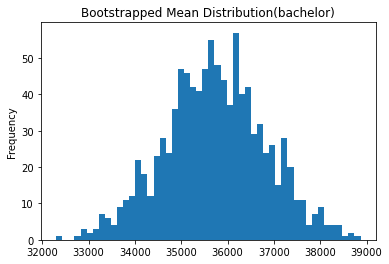

In [65]:
plt.hist(sample_mean_bachelor, bins=50)
plt.gca().set(title='Bootstrapped Mean Distribution(bachelor)', ylabel='Frequency')
print("variance :",statistics.variance(sample_mean_bachelor))
print("standard deviation :",statistics.stdev(sample_mean_bachelor))
print("mean :",statistics.mean(sample_mean_bachelor))
#plt.savefig('Q3c.1.png')

variance : 945489.6300917665
standard deviation : 972.3629106932074
mean : 52106.62789506046


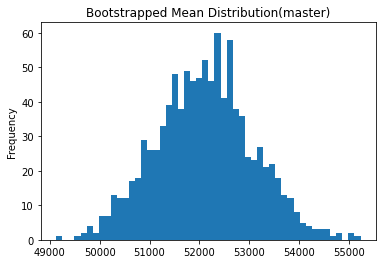

In [66]:
plt.hist(sample_mean_master, bins=50)
plt.gca().set(title='Bootstrapped Mean Distribution(master)', ylabel='Frequency')
print("variance :",statistics.variance(sample_mean_master))
print("standard deviation :",statistics.stdev(sample_mean_master))
print("mean :",statistics.mean(sample_mean_master))
#plt.savefig('Q3c.2.png')

variance : 4159183.577605572
standard deviation : 2039.4076536106193
mean : 68804.43597206053


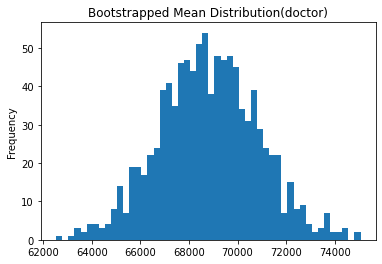

In [67]:
plt.hist(sample_mean_doctor, bins=50)
plt.gca().set(title='Bootstrapped Mean Distribution(doctor)', ylabel='Frequency')
print("variance :",statistics.variance(sample_mean_doctor))
print("standard deviation :",statistics.stdev(sample_mean_doctor))
print("mean :",np.mean(sample_mean_doctor))
#plt.savefig('Q3c.3.png')

In [68]:
sample_difference_mb = [i - j for i,j in zip(sample_mean_master,sample_mean_bachelor)]#get the differences between bootstrapped data
sample_difference_db = [i - j for i,j in zip(sample_mean_doctor,sample_mean_bachelor)]
sample_difference_dm = [i - j for i,j in zip(sample_mean_doctor,sample_mean_master)]

variance : 2063626.241545611
standard deviation : 1436.5327150975752
mean : 16377.885113779348


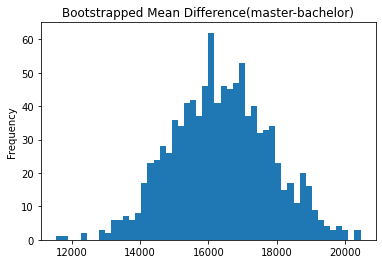

In [69]:
plt.hist(sample_difference_mb, bins=50)
plt.gca().set(title='Bootstrapped Mean Difference(master-bachelor)', ylabel='Frequency')
print("variance :",statistics.variance(sample_difference_mb))
print("standard deviation :",statistics.stdev(sample_difference_mb))
print("mean :",np.mean(sample_difference_mb))
#plt.savefig('Q3c.4.png')

variance : 5305434.97617491
standard deviation : 2303.35298557883
mean : 33075.69319077942


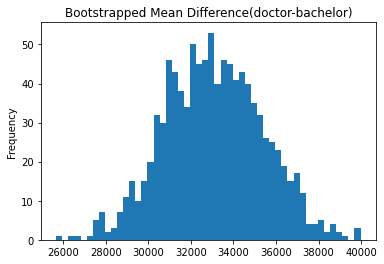

In [70]:
plt.hist(sample_difference_db, bins=50)
plt.gca().set(title='Bootstrapped Mean Difference(doctor-bachelor)', ylabel='Frequency')
print("variance :",statistics.variance(sample_difference_db))
print("standard deviation :",statistics.stdev(sample_difference_db))
print("mean :",np.mean(sample_difference_db))
#plt.savefig('Q3c.5.png')

variance : 5028720.784253191
standard deviation : 2242.4809440111617
mean : 16697.80807700007


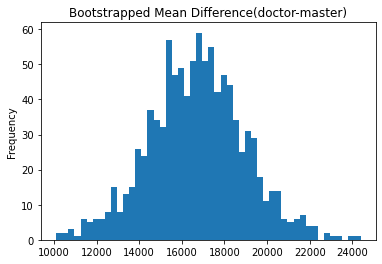

In [71]:
plt.hist(sample_difference_dm, bins=50)
plt.gca().set(title='Bootstrapped Mean Difference(doctor-master)', ylabel='Frequency')
print("variance :",statistics.variance(sample_difference_dm))
print("standard deviation :",statistics.stdev(sample_difference_dm))
print("mean :",np.mean(sample_difference_dm))
#plt.savefig('Q3c.6.png')

In [72]:
#PART 3 d
stats.f_oneway(sample_mean_bachelor,sample_mean_master,sample_mean_doctor)

F_onewayResult(statistic=130265.60474636256, pvalue=0.0)

In [73]:
#In the case of salary, we reject the null hypothesis and conclude that the salary between the 3  type of degree holders are different. 
#Doctoral degree holders tend to earn more salary (p-value<0.05, statistically significant)